# Exploratory Data Analysis of Goodreads Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_book=pd.read_csv('books.csv', error_bad_lines = False) 
df_book.columns = df_book.columns.str.strip()             

In [3]:
# Get publication year
df_book['publication_year']=df_book['publication_date'].str[-4:]
df_book['publication_year'] = pd.to_numeric(df_book['publication_year'], downcast="float") 

In [4]:
df_book.head(5) # show first 5 rows

,Unnamed: 0,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006.0
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004.0
2,2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003.0
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004.0
4,4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004.0


In [5]:
# Filter English language books
df_book = df_book[df_book['language_code'].str.startswith("en")] # Includes eng, en-GB and en-US

## Exploratory Data Analysis
1. Who is the most popular author on goodreads?
    1. Which author has the most books?
    1. Which author has the highest average ratings?
1. Which publisher has the most books?
1. What are the distributions of book ratings, number of pages and publication years?
1. Is there a relationship between book ratings, number of pages and publication years?

### 1A. Which author has the most books on Goodreads?

/home/fathia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


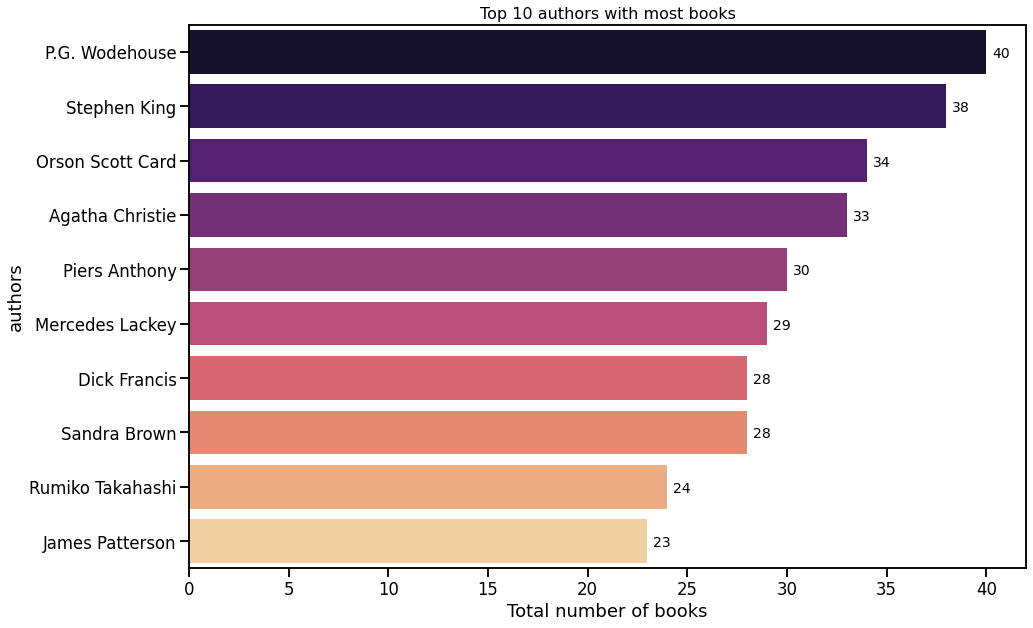

In [6]:
sns.set_context('talk')
most_books = df_book.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')

plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='magma')
ax.set_title("Top 10 authors with most books", fontsize=16)
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 14)

In [7]:
# The average ratings and average number of pages for the top 10 authors
most_books = df_book.groupby('authors').agg({'title':'count','average_rating':np.mean, 'num_pages':np.mean})
most_books = most_books.sort_values('title', ascending=False).head(10)
most_books = most_books.rename(columns={'num_pages':'average_num_pages','title':'num_books'})
most_books

,num_books,average_rating,average_num_pages
authors,,,
P.G. Wodehouse,40,4.147250,290.475000
Stephen King,38,3.980789,461.394737
Orson Scott Card,34,3.778824,396.852941
Agatha Christie,33,3.989091,319.878788
Piers Anthony,30,3.716667,362.766667
Mercedes Lackey,29,4.039310,395.862069
Dick Francis,28,3.962143,325.214286
Sandra Brown,28,3.735714,342.107143
Rumiko Takahashi,24,4.150417,229.708333


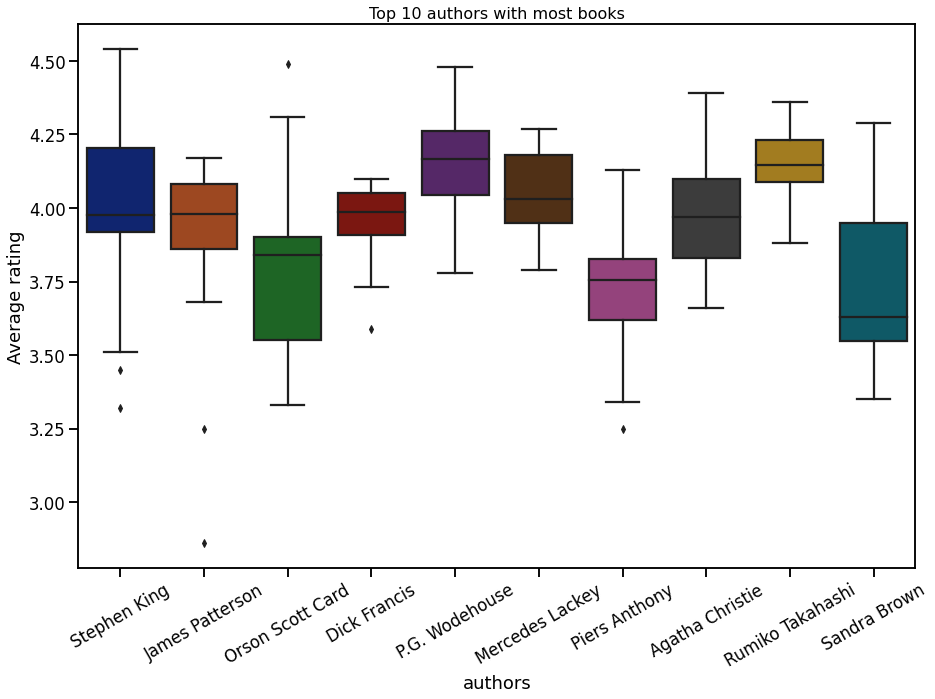

In [8]:
# Top 10 Authors vs average rating
most_books = df_book.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors');
df_most_books = df_book[df_book['authors'].isin(most_books.index.tolist())]
plt.figure(figsize=(15,10));
ax = sns.boxplot(x="authors", y="average_rating",
                    data=df_most_books, palette="dark")
ax.set_title("Top 10 authors with most books", fontsize=16)
ax.set_ylabel("Average rating")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

### 1B. Which author has the highest average ratings?

/home/fathia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


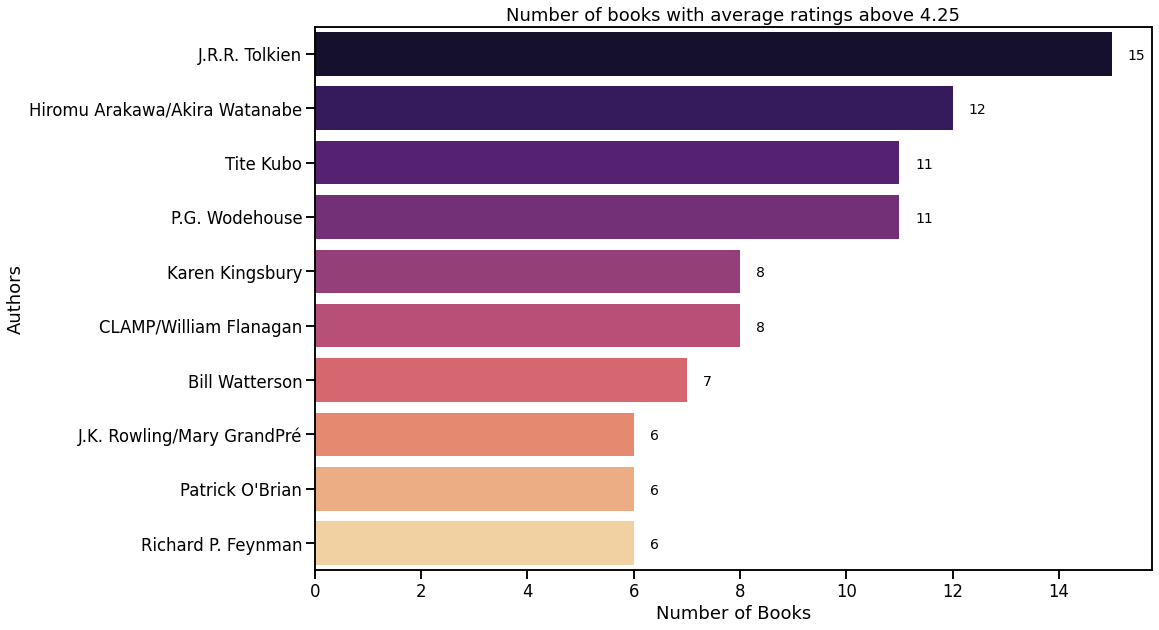

In [9]:
# Who is the highest rated author?
sns.set_context('talk')
high_rated_author = df_book[df_book['average_rating']>=4.25]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='magma')
ax.set_title("Number of books with average ratings above 4.25")
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 14)

###  2. Which are the publishers with the most books?

/home/fathia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


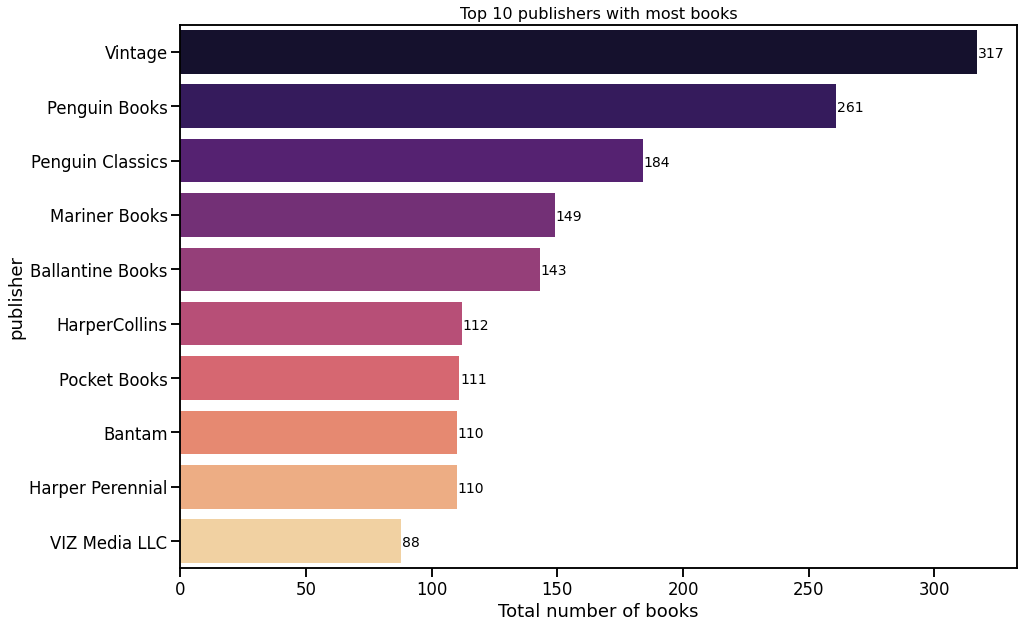

In [10]:
sns.set_context('talk')
most_books_publisher = df_book.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('publisher')

plt.figure(figsize=(15,10))
ax = sns.barplot(most_books_publisher['title'], most_books_publisher.index, palette='magma')
ax.set_title("Top 10 publishers with most books", fontsize=16)
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 14)

### 3A. What is the distribution of publication years?

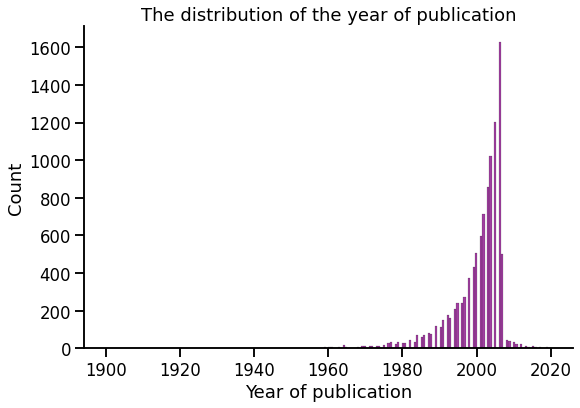

In [11]:
sns.set_context('talk')
fig = sns.displot(df_book, x='publication_year', kind="hist", color="purple")
plt.gcf().set_size_inches(10, 6)
plt.title("The distribution of the year of publication")
plt.xlabel("Year of publication")
plt.show()

### 3B. What is the distribution of average ratings for all the books?

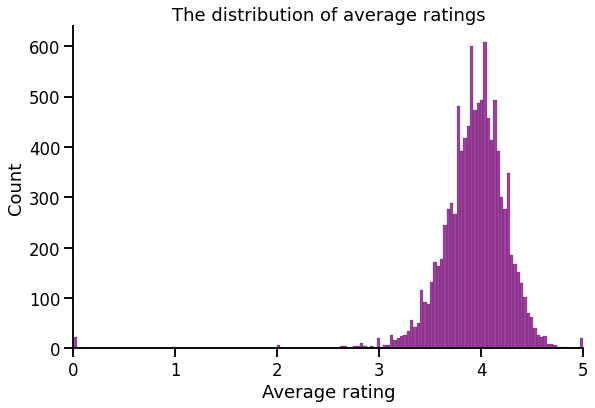

In [12]:
sns.set_context('talk')
fig = sns.displot(df_book, x="average_rating", kind="hist", color="purple")
plt.gcf().set_size_inches(10, 6)
plt.title("The distribution of average ratings")
plt.xlabel("Average rating")
plt.xlim(0, 5)
plt.show()

### 3C. What is the distribution of total number of pages?

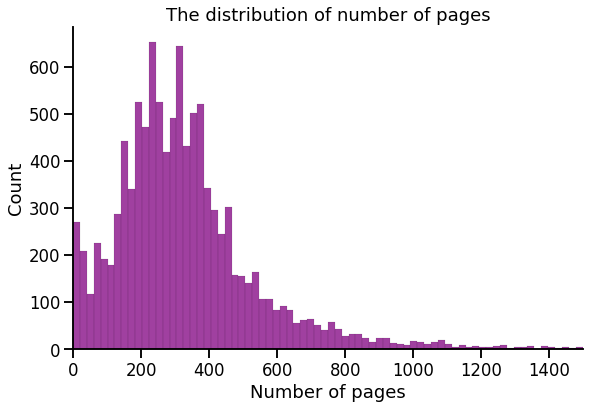

In [13]:
sns.set_context('talk')
fig = sns.displot(df_book, x="num_pages", kind="hist",color="purple")
plt.gcf().set_size_inches(10, 6)
plt.title("The distribution of number of pages")
plt.xlabel("Number of pages")
plt.xlim(0, 1500)
plt.show()

### 4A. Is there a relationship between the number of pages and the average ratings?

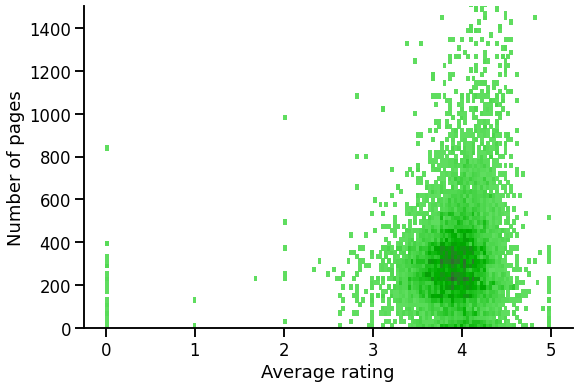

In [14]:
sns.set_context('talk')
fig = sns.displot(df_book, x="average_rating", y="num_pages",color="green",kind="hist")
plt.gcf().set_size_inches(10, 6)
plt.xlabel("Average rating")
plt.ylabel("Number of pages")
plt.ylim(0, 1500)
plt.show()

### 4B. Is there a relationship between the publication year and the average ratings?

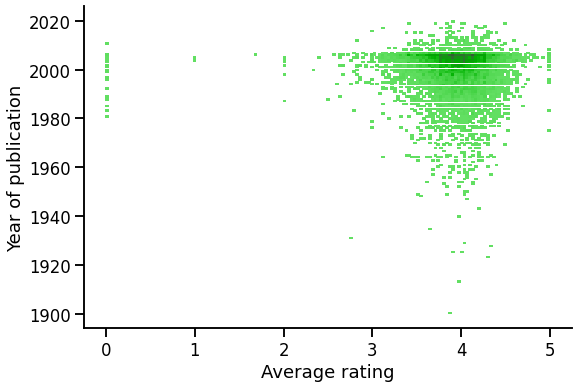

In [15]:
sns.set_context('talk')
fig = sns.displot(df_book, x="average_rating", y="publication_year",color="green",kind="hist")
plt.gcf().set_size_inches(10, 6)
plt.xlabel("Average rating")
plt.ylabel("Year of publication")
plt.show()

### 4C. Is there a relationship between the number of pages and the publication year?

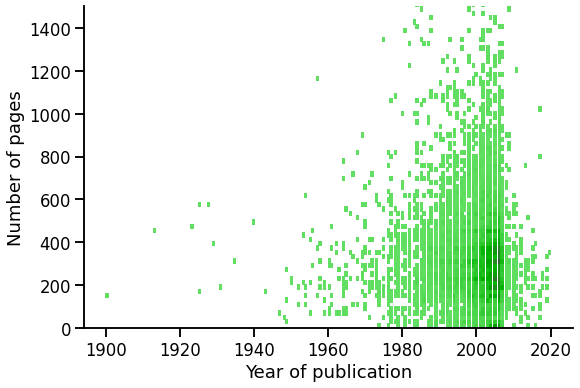

In [16]:
sns.set_context('talk')
fig = sns.displot(df_book, x="publication_year",y="num_pages",color="green",kind="hist")
plt.gcf().set_size_inches(10, 6)
plt.ylabel("Number of pages")
plt.xlabel("Year of publication")
plt.ylim(0, 1500)
plt.show()